In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------Split Train and Test Data----------
from sklearn.model_selection import train_test_split

# -----Classification ML Algorithms--------------
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.svm import SVC 

from sklearn.neighbors import KNeighborsClassifier

# ----------HyperParameter Tuning --------------
from sklearn.model_selection import GridSearchCV

# ---------Evaluating Performance Metrics-------
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# ---------SMOTE for OvrSampling----------------
from imblearn.over_sampling import SMOTE

# --------Supress Future Warning----------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../data/AfterDataCleaning.csv')

In [3]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,3,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,3,0,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X = df.drop('Exited',axis=1)
Y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=1234)

print(f'Shape of X_train is- {X_train.shape}')
print(f'Shape of X_test is- {X_test.shape}')
print(f'Shape of y_train is- {y_train.shape}')
print(f'Shape of y_test is- {y_test.shape}')

Shape of X_train is- (7000, 10)
Shape of X_test is- (3000, 10)
Shape of y_train is- (7000,)
Shape of y_test is- (3000,)


In [5]:
#sm = SMOTE(sampling_strategy=0.3, random_state=123)
#X_train, y_train = sm.fit_resample(X_train, y_train.ravel(),)
#
#print(f'Revised Shape of X_train is- {X_train.shape}')
#print(f'Revised Shape of y_train is- {y_train.shape}')

Revised Shape of X_train is- (1558, 14)
Revised Shape of y_train is- (1558,)


In [6]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, X_training_data, X_test_data, Y_training_data, Y_test_data, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_training_data)
    pred_test = model.predict(X_test_data)
    
    train_acc = accuracy_score(Y_training_data, pred_train)
    test_acc = accuracy_score(Y_test_data, pred_test)
    
    train_recall = recall_score(Y_training_data,pred_train)
    test_recall = recall_score(Y_test_data,pred_test)
    
    train_precision = precision_score(Y_training_data,pred_train)
    test_precision = precision_score(Y_test_data,pred_test)
    
    train_f1 = f1_score(Y_training_data,pred_train)
    test_f1 = f1_score(Y_test_data,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(Y_training_data,pred_train))
        print("Accuracy on test set : ",accuracy_score(Y_test_data,pred_test))
        print("Recall on training set : ",recall_score(Y_training_data,pred_train))
        print("Recall on test set : ",recall_score(Y_test_data,pred_test))
        print("Precision on training set : ",precision_score(Y_training_data,pred_train))
        print("Precision on test set : ",precision_score(Y_test_data,pred_test))
        print("F1-Score on training set : ",f1_score(Y_training_data,pred_train))
        print("F1-Score on test set : ",f1_score(Y_test_data,pred_test))
    
    return score_list # returning the list with train and test scores

In [7]:
def get_summary_of_models(models):
    # defining list of models

    # defining empty lists to add train and test results
    acc_train = []
    acc_test = []
    recall_train = []
    recall_test = []
    precision_train = []
    precision_test = []
    f1_train =[]
    f1_test = []
    roc_auc_train = []
    roc_auc_test = []
    
    # looping through all the models to get the accuracy, precall and precision scores
    for idx,model in enumerate(models):
            #print(model)
            j = get_metrics_score(model,X_train, X_test, y_train, y_test,False)
            acc_train.append(np.round(j[0],2))
            acc_test.append(np.round(j[1],2))
            recall_train.append(np.round(j[2],2))
            recall_test.append(np.round(j[3],2))
            precision_train.append(np.round(j[4],2))
            precision_test.append(np.round(j[5],2))
            f1_train.append(np.round(j[6],2))
            f1_test.append(np.round(j[7],2))
    
    model_metrics = pd.DataFrame({'TrainAccuracy': acc_train, 'TestAccuracy': acc_test, 'Train_Recall':recall_train, 
                                  'TestRecall':recall_test, 'TrainPrecision':precision_train, 'TestPrecision':precision_test, 
                                  'TrainF1Score':f1_train, 'TestF1Score':f1_test
                                 })
    
    return model_metrics

In [8]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_ROC_AUC_score(model, X_training_data, X_test_data, Y_training_data, Y_test_data, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train_prob = model.predict_proba(X_training_data)
    pred_train_prob = pred_train_prob[:,1]
    train_auc = roc_auc_score(Y_training_data, pred_train_prob)
    pred_test_prob = model.predict_proba(X_test_data)
    pred_test_prob = pred_test_prob[:,1]
    test_auc = roc_auc_score(Y_test_data,pred_test_prob)

    score_list.extend((train_auc,test_auc))
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:    
        print("ROC AUC Score on training set : ",roc_auc_score(Y_training_data,pred_train_prob))
        print("ROC AUC Score on test set : ",roc_auc_score(Y_test_data,pred_test_prob))
        
    return score_list

In [9]:
def get_ROC_AUC_score_of_models(models):
    # defining list of models

    roc_auc_train = []
    roc_auc_test = []
    
    # looping through all the models to get the accuracy, precall and precision scores
    for idx,model in enumerate(models):
            #print(model)
            j = get_ROC_AUC_score(model,X_train, X_test, y_train, y_test,False)
            roc_auc_train.append(np.round(j[0],2))
            roc_auc_test.append(np.round(j[1],2))
    
    model_auc_score = pd.DataFrame({'Train ROC-AUC Score': roc_auc_train, 'Test ROC-AUC Score': roc_auc_test})
    
    return model_auc_score

## 1. Logistic Regression

In [10]:
lr_model = LogisticRegression(class_weight='balanced', random_state=123)
lr_model.fit(X_train,y_train)
y_lr_train_predicted = lr_model.predict(X_train)
y_lr_test_predicted = lr_model.predict(X_test)
metrics.accuracy_score(y_train,y_lr_train_predicted)
#Using above defined function to get accuracy, recall and precision on train and test set
lr_score=get_metrics_score(lr_model, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.6548571428571428
Accuracy on test set :  0.6563333333333333
Recall on training set :  0.6713189113747383
Recall on test set :  0.6639072847682119
Precision on training set :  0.3309253525971792
Precision on test set :  0.32628152969894225
F1-Score on training set :  0.44331797235023035
F1-Score on test set :  0.43753409710856517


In [11]:
print('Classification Report for Training Data- \n',classification_report(y_train, y_lr_train_predicted))
print('\nClassification Report for Test Data- \n',classification_report(y_test, y_lr_test_predicted))
print('Confusion matrix for the train Data- \n',confusion_matrix(y_train, y_lr_train_predicted))
print('\nConfusion matrix for the test Data- \n',confusion_matrix(y_test, y_lr_test_predicted))

Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.88      0.65      0.75      5567
           1       0.33      0.67      0.44      1433

    accuracy                           0.65      7000
   macro avg       0.61      0.66      0.60      7000
weighted avg       0.77      0.65      0.69      7000


Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.89      0.65      0.75      2396
           1       0.33      0.66      0.44       604

    accuracy                           0.66      3000
   macro avg       0.61      0.66      0.60      3000
weighted avg       0.77      0.66      0.69      3000

Confusion matrix for the train Data- 
 [[3622 1945]
 [ 471  962]]

Confusion matrix for the test Data- 
 [[1568  828]
 [ 203  401]]


## 2. Linear Discriminant Analysis

In [12]:
lda_model = LinearDiscriminantAnalysis(n_components=1)
lda_model.fit(X_train,y_train)
y_lda_train_predicted = lda_model.predict(X_train)
y_lda_test_predicted = lda_model.predict(X_test)

#Using above defined function to get accuracy, recall and precision on train and test set
lda_score=get_metrics_score(lda_model, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.8045714285714286
Accuracy on test set :  0.807
Recall on training set :  0.19120725750174458
Recall on test set :  0.1986754966887417
Precision on training set :  0.567287784679089
Precision on test set :  0.5581395348837209
F1-Score on training set :  0.2860125260960334
F1-Score on test set :  0.293040293040293


In [13]:
print('Classification Report for Training Data- \n',classification_report(y_train, y_lda_train_predicted))
print('\nClassification Report for Test Data- \n',classification_report(y_test, y_lda_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_lda_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_lda_test_predicted))

Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.82      0.96      0.89      5567
           1       0.57      0.19      0.29      1433

    accuracy                           0.80      7000
   macro avg       0.69      0.58      0.59      7000
weighted avg       0.77      0.80      0.76      7000


Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      2396
           1       0.56      0.20      0.29       604

    accuracy                           0.81      3000
   macro avg       0.69      0.58      0.59      3000
weighted avg       0.77      0.81      0.77      3000

Confusion matrix for the train data- 
 [[5358  209]
 [1159  274]]

Confusion matrix for the test data- 
 [[2301   95]
 [ 484  120]]


## 3 Gaussian Naive Bayes

In [14]:
GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)

# make predictions for train data
y_gnb_train_predicted = GNB_model.predict(X_train)
# make predictions for test data
y_gnb_test_predicted = GNB_model.predict(X_test)
#Using above defined function to get accuracy, recall and precision on train and test set
gnb_score=get_metrics_score(GNB_model, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.7827142857142857
Accuracy on test set :  0.7873333333333333
Recall on training set :  0.07606420097697139
Recall on test set :  0.0728476821192053
Precision on training set :  0.3562091503267974
Precision on test set :  0.36065573770491804
F1-Score on training set :  0.12535940195514667
F1-Score on test set :  0.1212121212121212


In [15]:
# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train, y_gnb_train_predicted))
print('\nClassification Report for Test Data- \n',classification_report(y_test, y_gnb_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_gnb_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_gnb_test_predicted))

Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.80      0.96      0.88      5567
           1       0.36      0.08      0.13      1433

    accuracy                           0.78      7000
   macro avg       0.58      0.52      0.50      7000
weighted avg       0.71      0.78      0.72      7000


Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      2396
           1       0.36      0.07      0.12       604

    accuracy                           0.79      3000
   macro avg       0.58      0.52      0.50      3000
weighted avg       0.72      0.79      0.73      3000

Confusion matrix for the train data- 
 [[5370  197]
 [1324  109]]

Confusion matrix for the test data- 
 [[2318   78]
 [ 560   44]]


## 4. Decision Tree Classifier

In [16]:
dt_model = DecisionTreeClassifier(class_weight='balanced')
dt_model.fit(X_train,y_train)
y_dt_train_predicted = dt_model.predict(X_train)
y_dt_test_predicted = dt_model.predict(X_test)
print('Decision Tree Score is ',dt_model.score(X_train, y_train))
dt_score=gnb_score=get_metrics_score(dt_model, X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('Classification report for the training data \n',classification_report(y_train, y_dt_train_predicted))
print('Classification report for the test data \n',classification_report(y_test, y_dt_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_dt_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_dt_test_predicted))

Decision Tree Score is  1.0
Accuracy on training set :  1.0
Accuracy on test set :  0.8056666666666666
Recall on training set :  1.0
Recall on test set :  0.47019867549668876
Precision on training set :  1.0
Precision on test set :  0.5191956124314442
F1-Score on training set :  1.0
F1-Score on test set :  0.49348392701998256
Classification report for the training data 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5567
           1       1.00      1.00      1.00      1433

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000

Classification report for the test data 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      2396
           1       0.52      0.47      0.49       604

    accuracy                           0.81      3000
   macro avg       0.69      0.68      

## 5. GridSearch on Decision Tree Classifier

In [18]:
param_grid = {
        'max_depth' : [10,15,20,25,30], # maximum number of levels allowed in each decision tree
        'min_samples_split' : [3,6,9,12,15,30,35], # minimum sample number to split a node
        'min_samples_leaf' : [9,12,15,18,21,24],
        'criterion' :['gini', 'entropy'],
        'class_weight': ['balanced']
    
}

dt_tuned = DecisionTreeClassifier()

gs_dt = GridSearchCV(estimator = dt_tuned, 
                      param_grid = param_grid, 
                      cv = 5,
                      verbose = True,
                      n_jobs= -1
                      )

gs_dt.fit(X_train, y_train)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_leaf': [9, 12, 15, 18, 21, 24],
                         'min_samples_split': [3, 6, 9, 12, 15, 30, 35]},
             verbose=True)

In [19]:
print('Best Params are-', gs_dt.best_params_)
print('\n\nBest Score is-',gs_dt.best_score_)

# Set the clf to the best combination of parameters
gs_dt_tuned = gs_dt.best_estimator_

gs_dt_tuned.fit(X_train, y_train)

y_gs_dt_train_predicted = gs_dt_tuned.predict(X_train)

y_gs_dt_test_predicted = gs_dt_tuned.predict(X_test)

dt_score=get_metrics_score(gs_dt_tuned,X_train, X_test, y_train, y_test)

Best Params are- {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 15}


Best Score is- 0.7581428571428571
Accuracy on training set :  0.818
Accuracy on test set :  0.756
Recall on training set :  0.8681088625261689
Recall on test set :  0.6771523178807947
Precision on training set :  0.5341348218119365
Precision on test set :  0.4323467230443975
F1-Score on training set :  0.6613503455608719
F1-Score on test set :  0.5277419354838709


Text(0.5, 0, 'Decision Tree Feature Importance')

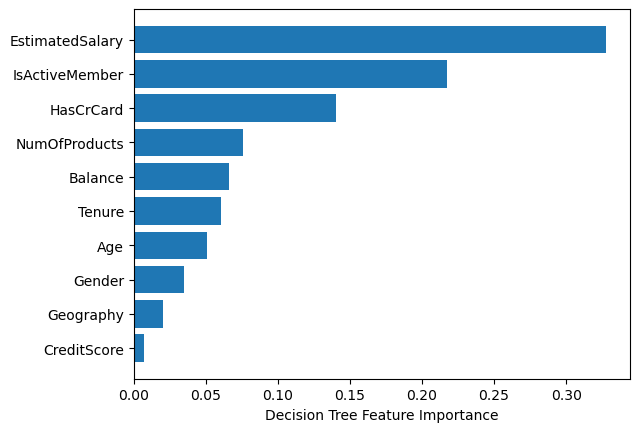

In [20]:
sorted_idx = gs_dt_tuned.feature_importances_.argsort()
plt.barh(X_train.columns,gs_dt_tuned.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")

## 6. Random Forest Ensemble Technique

In [21]:
RF_model=RandomForestClassifier(max_depth=7,max_features=5,min_samples_leaf=10,min_samples_split=25,n_estimators=40,
                                class_weight='balanced',random_state=1)
RF_model.fit(X_train, y_train)

y_rf_train_predicted = RF_model.predict(X_train)
y_rf_test_predicted = RF_model.predict(X_test)
rf_score=get_metrics_score(RF_model,X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('\n\nClassification report for the training data \n',classification_report(y_train, y_rf_train_predicted))
print('Classification report for the test data \n',classification_report(y_test, y_rf_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_rf_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_rf_test_predicted))

Accuracy on training set :  0.832
Accuracy on test set :  0.806
Recall on training set :  0.7634333565945569
Recall on test set :  0.6672185430463576
Precision on training set :  0.5665458311755567
Precision on test set :  0.514030612244898
F1-Score on training set :  0.6504161712247325
F1-Score on test set :  0.5806916426512969


Classification report for the training data 
               precision    recall  f1-score   support

           0       0.93      0.85      0.89      5567
           1       0.57      0.76      0.65      1433

    accuracy                           0.83      7000
   macro avg       0.75      0.81      0.77      7000
weighted avg       0.86      0.83      0.84      7000

Classification report for the test data 
               precision    recall  f1-score   support

           0       0.91      0.84      0.87      2396
           1       0.51      0.67      0.58       604

    accuracy                           0.81      3000
   macro avg       0.71      0.75 

## 7. RandomForest Tuned

In [22]:
param_grid = {
        #'max_depth': [5,7,9,11,13],
        'max_features': [3,5,7,9],
        'n_estimators': [25,30,35], # number of trees in the random forest
        'max_depth' : [5,7,10,15], # maximum number of levels allowed in each decision tree
        'min_samples_split' : [3,6,9,12], #,15,20,25,30, # minimum sample number to split a node
        'min_samples_leaf' : [10,12,15,18], # minimum sample number that can be stored in a leaf node
        'class_weight': ['balanced']
}

rf_tuned = RandomForestClassifier(random_state=123)

gs_rf = GridSearchCV(estimator = rf_tuned, 
                      param_grid = param_grid, 
                      cv = 3,
                      verbose = True,
                      n_jobs= -1
                      )

gs_rf.fit(X_train, y_train)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [5, 7, 10, 15],
                         'max_features': [3, 5, 7, 9],
                         'min_samples_leaf': [10, 12, 15, 18],
                         'min_samples_split': [3, 6, 9, 12],
                         'n_estimators': [25, 30, 35]},
             verbose=True)

In [23]:
print('Best Params are-', gs_rf.best_params_)
print('\n\nBest Score is-',gs_rf.best_score_)

# Set the clf to the best combination of parameters
gs_rf_tuned = gs_rf.best_estimator_

gs_rf_tuned.fit(X_train, y_train)

y_gs_rf_train_predicted = gs_rf_tuned.predict(X_train)
y_gs_rf_test_predicted = gs_rf_tuned.predict(X_test)

# summarize the fit of the model
print('\nClassification report for the training data \n',classification_report(y_train, y_gs_rf_train_predicted))
print('Classification report for the test data \n',classification_report(y_test, y_gs_rf_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_gs_rf_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_gs_rf_test_predicted))

Best Params are- {'class_weight': 'balanced', 'max_depth': 15, 'max_features': 9, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 35}


Best Score is- 0.8277139726044839

Classification report for the training data 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      5567
           1       0.69      0.86      0.77      1433

    accuracy                           0.89      7000
   macro avg       0.83      0.88      0.85      7000
weighted avg       0.91      0.89      0.90      7000

Classification report for the test data 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      2396
           1       0.57      0.65      0.61       604

    accuracy                           0.83      3000
   macro avg       0.74      0.76      0.75      3000
weighted avg       0.84      0.83      0.83      3000

Confusion matrix for the train data- 
 [[5023  544]
 [ 205 1228]]

Conf

Text(0.5, 0, 'Random Forest Feature Importance')

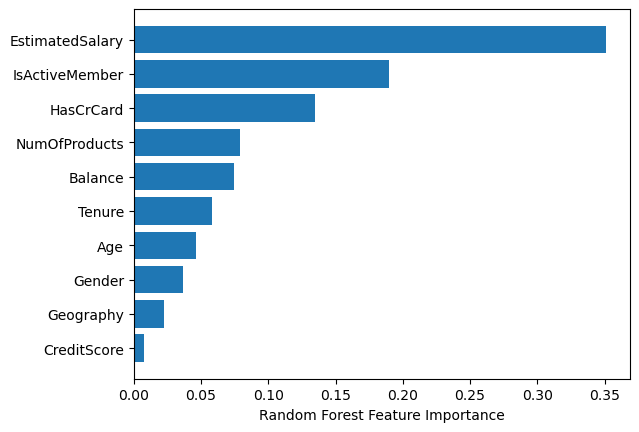

In [24]:
sorted_idx = gs_rf_tuned.feature_importances_.argsort()
plt.barh(X_train.columns,gs_rf_tuned.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## 8. Gradient Boosting

In [28]:
gbc_model = GradientBoostingClassifier(random_state=1)
gbc_model.fit(X_train,y_train)
# make predictions for train data
y_gbc_train_predicted = gbc_model.predict(X_train)

# make predictions for test data
y_gbc_test_predicted = gbc_model.predict(X_test)
gbc_score=get_metrics_score(gbc_model,X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train, y_gbc_train_predicted))
print('Classification Report for Test Data- \n',classification_report(y_test, y_gbc_test_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train, y_gbc_train_predicted))
print('\nConfusion Matrix for Test Data - \n',confusion_matrix(y_test, y_gbc_test_predicted))

Accuracy on training set :  0.8741428571428571
Accuracy on test set :  0.8633333333333333
Recall on training set :  0.4961618981158409
Recall on test set :  0.445364238410596
Precision on training set :  0.8172413793103448
Precision on test set :  0.7819767441860465
F1-Score on training set :  0.617455492835432
F1-Score on test set :  0.5675105485232067
Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      5567
           1       0.82      0.50      0.62      1433

    accuracy                           0.87      7000
   macro avg       0.85      0.73      0.77      7000
weighted avg       0.87      0.87      0.86      7000

Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      2396
           1       0.78      0.45      0.57       604

    accuracy                           0.86      3000
   macro avg     

## 9. Gradient Boosting Tuned

In [29]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from article
param_grid = {
    "n_estimators": [20,30,40],
    "subsample":[0.9],
    "max_features":[0.8],
    "learning_rate": [0.1],
    'max_depth' : [1,2,3,4,5,10,15,20], # maximum number of levels allowed in each decision tree
    'min_samples_split' : [30,35,40,45], # minimum sample number to split a node
    'min_samples_leaf' : [3,6,9,12,15]
}


gs_gbc = GridSearchCV(estimator = gbc_tuned, 
                      param_grid = param_grid, 
                      cv = 3,
                      verbose = 1,
                      return_train_score = True,
                      n_jobs= -1
                      )

gs_gbc.fit(X_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20],
                         'max_features': [0.8],
                         'min_samples_leaf': [3, 6, 9, 12, 15],
                         'min_samples_split': [30, 35, 40, 45],
                         'n_estimators': [20, 30, 40], 'subsample': [0.9]},
             return_train_score=True, verbose=1)

In [30]:
print('Best Params are-', gs_gbc.best_params_)
print('\n\nBest Score is-',gs_gbc.best_score_)

# Set the clf to the best combination of parameters
gs_gbc_tuned = gs_gbc.best_estimator_
gs_gbc_tuned.fit(X_train, y_train)

y_gs_gbc_train_predicted = gs_gbc_tuned.predict(X_train)
y_gs_gbc_test_predicted = gs_gbc_tuned.predict(X_test)

# summarize the fit of the model
print('Classification report for the training data \n',classification_report(y_train, y_gs_gbc_train_predicted))
print('Classification report for the test data \n',classification_report(y_test, y_gs_gbc_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_gs_gbc_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_gs_gbc_test_predicted))

Best Params are- {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 0.8, 'min_samples_leaf': 3, 'min_samples_split': 40, 'n_estimators': 40, 'subsample': 0.9}


Best Score is- 0.8635707904409896
Classification report for the training data 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      5567
           1       0.84      0.50      0.63      1433

    accuracy                           0.88      7000
   macro avg       0.86      0.74      0.78      7000
weighted avg       0.87      0.88      0.87      7000

Classification report for the test data 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      2396
           1       0.79      0.43      0.56       604

    accuracy                           0.86      3000
   macro avg       0.83      0.70      0.74      3000
weighted avg       0.86      0.86      0.85      3000

Confusion matrix for the train data- 
 [[5431  136]
 [ 717 

Text(0.5, 0, 'Gradient Boosting Feature Importance')

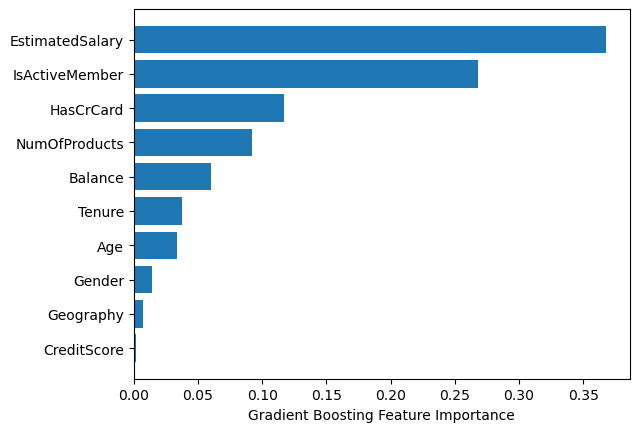

In [31]:
sorted_idx = gs_gbc_tuned.feature_importances_.argsort()
plt.barh(X_train.columns,gs_gbc_tuned.feature_importances_[sorted_idx])
plt.xlabel("Gradient Boosting Feature Importance")

## 10. Bagging Classifier

In [32]:
bc_model = BaggingClassifier(random_state=1)
bc_model.fit(X_train,y_train)
# make predictions for train data
y_bc_train_predicted = bc_model.predict(X_train)

# make predictions for test data
y_bc_test_predicted = bc_model.predict(X_test)
bc_score=get_metrics_score(bc_model,X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train, y_bc_train_predicted))
print('Classification Report for Test Data- \n',classification_report(y_test, y_bc_test_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train, y_bc_train_predicted))
print('\nConfusion Matrix for Test Data - \n',confusion_matrix(y_test, y_bc_test_predicted))

Accuracy on training set :  0.9882857142857143
Accuracy on test set :  0.853
Recall on training set :  0.9462665736217725
Recall on test set :  0.43543046357615894
Precision on training set :  0.9963262307127112
Precision on test set :  0.7245179063360881
F1-Score on training set :  0.9706513958482461
F1-Score on test set :  0.5439503619441571
Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      5567
           1       1.00      0.95      0.97      1433

    accuracy                           0.99      7000
   macro avg       0.99      0.97      0.98      7000
weighted avg       0.99      0.99      0.99      7000

Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      2396
           1       0.72      0.44      0.54       604

    accuracy                           0.85      3000
   macro avg       0.80    

## 11. Ada Boosting Classifier

In [33]:
abc_model = AdaBoostClassifier(random_state=1)
abc_model.fit(X_train,y_train)
# make predictions for train data
y_abc_train_predicted = abc_model.predict(X_train)

# make predictions for test data
y_abc_test_predicted = abc_model.predict(X_test)
abc_score=get_metrics_score(abc_model,X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train, y_abc_train_predicted))
print('Classification Report for Test Data- \n',classification_report(y_test, y_abc_test_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train, y_abc_train_predicted))
print('\nConfusion Matrix for Test Data - \n',confusion_matrix(y_test, y_abc_test_predicted))

Accuracy on training set :  0.8595714285714285
Accuracy on test set :  0.857
Recall on training set :  0.4884856943475227
Recall on test set :  0.46357615894039733
Precision on training set :  0.7368421052631579
Precision on test set :  0.7272727272727273
F1-Score on training set :  0.5874947545111204
F1-Score on test set :  0.5662285136501517
Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      5567
           1       0.74      0.49      0.59      1433

    accuracy                           0.86      7000
   macro avg       0.81      0.72      0.75      7000
weighted avg       0.85      0.86      0.85      7000

Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.88      0.96      0.91      2396
           1       0.73      0.46      0.57       604

    accuracy                           0.86      3000
   macro avg       0.80    

## 12 Voting Classifier

In [34]:
# defining list of models
estimator= [('LR',lr_model), ('LDA',lda_model), ('GNB',GNB_model), ('DT',dt_model), ('GSDT',gs_dt_tuned), ('RF',RF_model),
            ('GSRF',gs_rf_tuned), ('GBC',gbc_model), ('GSGBC',gs_gbc_tuned), ('BC', bc_model),('ABC',abc_model)]

In [35]:
soft_vc_model = VotingClassifier(estimators= estimator, voting='soft')
soft_vc_model.fit(X_train,y_train)

# make predictions for train data
y_soft_vc_train_predicted = soft_vc_model.predict(X_train)

# make predictions for test data
y_soft_vc_test_predicted = soft_vc_model.predict(X_test)
soft_vc_score=get_metrics_score(abc_model,X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train, y_soft_vc_train_predicted))
print('Classification Report for Test Data- \n',classification_report(y_test, y_soft_vc_test_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train, y_soft_vc_train_predicted))
print('\nConfusion Matrix for Test Data - \n',confusion_matrix(y_test, y_soft_vc_test_predicted))

Accuracy on training set :  0.8595714285714285
Accuracy on test set :  0.857
Recall on training set :  0.4884856943475227
Recall on test set :  0.46357615894039733
Precision on training set :  0.7368421052631579
Precision on test set :  0.7272727272727273
F1-Score on training set :  0.5874947545111204
F1-Score on test set :  0.5662285136501517
Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      5567
           1       0.91      0.74      0.82      1433

    accuracy                           0.93      7000
   macro avg       0.92      0.86      0.89      7000
weighted avg       0.93      0.93      0.93      7000

Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      2396
           1       0.71      0.51      0.59       604

    accuracy                           0.86      3000
   macro avg       0.80    

In [36]:
hard_vc_model = VotingClassifier(estimators= estimator, voting='hard')
hard_vc_model.fit(X_train,y_train)

# make predictions for train data
y_hard_vc_train_predicted = hard_vc_model.predict(X_train)

# make predictions for test data
y_hard_vc_test_predicted = hard_vc_model.predict(X_test)
hard_vc_score=get_metrics_score(abc_model,X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train, y_hard_vc_train_predicted))
print('Classification Report for Test Data- \n',classification_report(y_test, y_hard_vc_test_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train, y_hard_vc_train_predicted))
print('\nConfusion Matrix for Test Data - \n',confusion_matrix(y_test, y_hard_vc_test_predicted))

Accuracy on training set :  0.8595714285714285
Accuracy on test set :  0.857
Recall on training set :  0.4884856943475227
Recall on test set :  0.46357615894039733
Precision on training set :  0.7368421052631579
Precision on test set :  0.7272727272727273
F1-Score on training set :  0.5874947545111204
F1-Score on test set :  0.5662285136501517
Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      5567
           1       0.86      0.67      0.75      1433

    accuracy                           0.91      7000
   macro avg       0.89      0.82      0.85      7000
weighted avg       0.91      0.91      0.91      7000

Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      2396
           1       0.74      0.49      0.59       604

    accuracy                           0.86      3000
   macro avg       0.81    

<Figure size 1200x600 with 0 Axes>

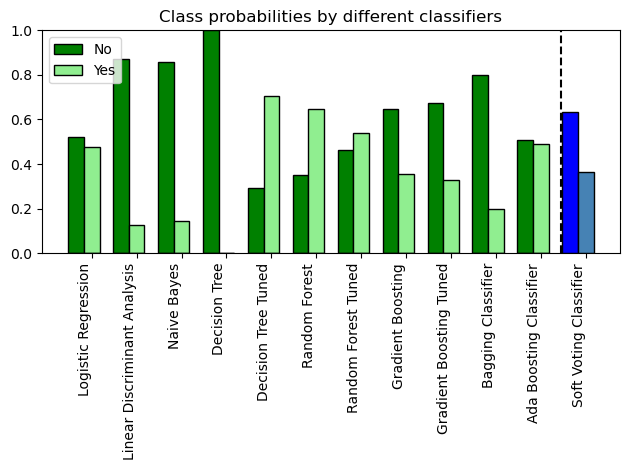

In [37]:
models_list = [lr_model, lda_model, GNB_model, dt_model, gs_dt_tuned, RF_model, gs_rf_tuned, gbc_model, gs_gbc_tuned, bc_model, 
          abc_model, soft_vc_model]

probability_list = [c.fit(X_train, y_train).predict_proba(X) for c in models_list]

class1_1 = [pr[0, 0] for pr in probability_list]
class2_1 = [pr[0, 1] for pr in probability_list]

# plotting

N = 12  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

plt.figure(figsize=(12,6))
fig, ax = plt.subplots()

# bars for classifier 1-11
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width, color="green", edgecolor="k")
p2 = ax.bar(
    ind + width,
    np.hstack(([class2_1[:-1], [0]])),
    width,
    color="lightgreen",
    edgecolor="k",
)

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, class1_1[-1]], width, color="blue", edgecolor="k")
p4 = ax.bar(
    ind + width, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, class2_1[-1]], width, color="steelblue", edgecolor="k"
)

# plot annotations
plt.axvline(10.8, color="k", linestyle="dashed")
ax.set_xticks(ind + width)
ax.set_xticklabels(
    ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes','Decision Tree','Decision Tree Tuned', 
     'Random Forest','Random Forest Tuned', 'Gradient Boosting','Gradient Boosting Tuned',
     'Bagging Classifier','Ada Boosting Classifier','Soft Voting Classifier'],
    rotation=90,
    ha="right",
)
plt.ylim([0, 1])
plt.title("Class probabilities by different classifiers")
plt.legend([p1[0], p2[0]], ["No", "Yes"], loc="upper left")
plt.tight_layout()
plt.show()

In [38]:
models_list = [lr_model, lda_model, GNB_model, dt_model, gs_dt_tuned, RF_model, gs_rf_tuned, gbc_model, gs_gbc_tuned, bc_model, 
          abc_model, soft_vc_model, hard_vc_model]

index_list = ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes','Decision Tree','Decision Tree Tuned', 
              'Random Forest','Random Forest Tuned', 'Gradient Boosting Classifier','Gradient Boosting Classifier Tuned',
              'Bagging Classifier','Ada Boosting Classifier','Soft Voting Classifier', 'Hard Voting Classifier']

all_model_comparison = get_summary_of_models(models_list)

all_model_comparison = all_model_comparison.set_index(pd.Index(index_list))

all_model_comparison

,TrainAccuracy,TestAccuracy,Train_Recall,TestRecall,TrainPrecision,TestPrecision,TrainF1Score,TestF1Score
Logistic Regression,0.65,0.66,0.67,0.66,0.33,0.33,0.44,0.44
Linear Discriminant Analysis,0.80,0.81,0.19,0.20,0.57,0.56,0.29,0.29
Naive Bayes,0.78,0.79,0.08,0.07,0.36,0.36,0.13,0.12
Decision Tree,1.00,0.81,1.00,0.48,1.00,0.53,1.00,0.50
Decision Tree Tuned,0.82,0.76,0.87,0.68,0.53,0.43,0.66,0.53
Random Forest,0.83,0.81,0.76,0.67,0.57,0.51,0.65,0.58
Random Forest Tuned,0.89,0.83,0.86,0.65,0.69,0.57,0.77,0.61
Gradient Boosting Classifier,0.87,0.86,0.50,0.45,0.82,0.78,0.62,0.57
Gradient Boosting Classifier Tuned,0.88,0.86,0.50,0.43,0.84,0.79,0.63,0.56
Bagging Classifier,0.99,0.85,0.95,0.44,1.00,0.72,0.97,0.54


In [39]:
models_list = [lr_model, lda_model, GNB_model, dt_model, gs_dt_tuned, RF_model, gs_rf_tuned, gbc_model, gs_gbc_tuned, bc_model, 
              abc_model]

index_list = ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes','Decision Tree','Decision Tree Tuned', 
              'Random Forest','Random Forest Tuned', 'Gradient Boosting Classifier','Gradient Boosting Classifier Tuned',
              'Bagging Classifier','Ada Boosting Classifier']

model_auc_score = get_ROC_AUC_score_of_models(models_list)

model_auc_score = model_auc_score.set_index(pd.Index(index_list))

model_auc_score

,Train ROC-AUC Score,Test ROC-AUC Score
Logistic Regression,0.71,0.71
Linear Discriminant Analysis,0.76,0.75
Naive Bayes,0.75,0.74
Decision Tree,1.00,0.69
Decision Tree Tuned,0.93,0.78
Random Forest,0.90,0.85
Random Forest Tuned,0.96,0.85
Gradient Boosting Classifier,0.89,0.86
Gradient Boosting Classifier Tuned,0.90,0.86
Bagging Classifier,1.00,0.81


# 13. StackingCVClassifier

In [40]:
from mlxtend.classifier import StackingCVClassifier

stack_clf_model = StackingCVClassifier(classifiers= models_list,
                                       shuffle = False,
                                       use_probas = True,
                                       cv = 5,
                                       meta_classifier = gs_rf_tuned
                                      )
stack_clf_model.fit(X_train,y_train)

# make predictions for train data
y_stack_clf_train_predicted = stack_clf_model.predict(X_train)

# make predictions for test data
y_stack_clf_test_predicted = stack_clf_model.predict(X_test)
stack_clf_score=get_metrics_score(stack_clf_model,X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train, y_stack_clf_train_predicted))
print('Classification Report for Test Data- \n',classification_report(y_test, y_stack_clf_test_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train, y_stack_clf_train_predicted))
print('\nConfusion Matrix for Test Data - \n',confusion_matrix(y_test, y_stack_clf_test_predicted))

Accuracy on training set :  0.8637142857142858
Accuracy on test set :  0.8396666666666667
Recall on training set :  0.7083042568039079
Recall on test set :  0.6341059602649006
Precision on training set :  0.6544165054803353
Precision on test set :  0.5956454121306376
F1-Score on training set :  0.6802949061662198
F1-Score on test set :  0.6142742582197273
Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      5567
           1       0.65      0.71      0.68      1433

    accuracy                           0.86      7000
   macro avg       0.79      0.81      0.80      7000
weighted avg       0.87      0.86      0.87      7000

Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      2396
           1       0.60      0.63      0.61       604

    accuracy                           0.84      3000
   macro avg   

## Random Forest Tuned seems to be the best performing model in all parameters.